<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_06_interpolacion.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 6
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

__Activity__:  Movement with uniform acceleration
1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second pass for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}



__Activity__: For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.


__Activity__: Apply lagrange interpolations with the following points, work with pandas data frame


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])



__Activity__: Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.


![img](https://github.com/hernansalinas/autogrades/blob/main/Actividades_clase/imagenes/planetario.png?raw=true)
1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

# **Trabajo en clase**

In [67]:
import numpy as np
import matplotlib.pylab as plt
import scipy as sp
from scipy import interpolate 
import pandas as pd
from scipy.interpolate import interp1d

In [2]:
#Ejemplo profe

In [3]:
x1 = np.array([1,2,4,6])
y1 = np.array([3,8,9,10])

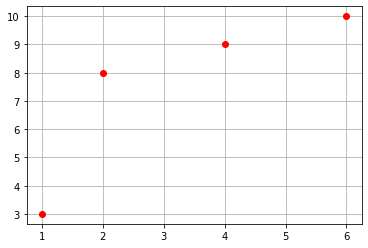

In [4]:
plt.figure()
plt.plot(x1,y1, 'ro')
plt.grid()

In [68]:
f = interp1d(x1,y1, kind="cubic")

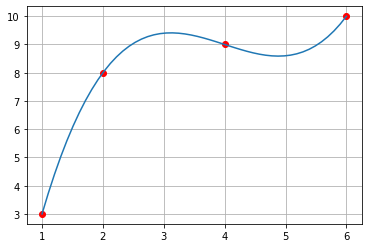

In [69]:
x_ = np.linspace(np.min(x1),np.max(x1))
plt.figure()
plt.plot(x1,y1, 'ro')
plt.plot(x_,f(x_))
plt.grid()

# **Solución Actividad 01**

In [27]:
#Condiciones iniciales

#Carro 1

x0 = 0
a1 = 6
v0 = 0
t0 = 0

#Carro 2

v0 = 10
a2 = 10
x0 = 0
t0 = 10

#Tiempo transcurrido

t = 10

In [35]:
#Ecuacion de movimiento carro 1

x0 = 0
a1 = 6
v0 = 0
t0 = 0

x_1 = np.poly1d([0.5*a1,v0-a1*t0,x0-v0*t0+0.5*a1*t0**2],variable='t')
print(x_1)

   2
3 t


In [34]:
#Ecuacion de movimiento carro 2

v0 = 10
a2 = 10
x0 = 0
t0 = 10

x_2 = np.poly1d([0.5*a2,v0-a2*t0,x0-v0*t0+0.5*a2*t0**2],variable='t')
print(x_2)

   2
5 t - 90 t + 400


In [37]:
#Encontrar donde se encuentran los dos carros

x = x_1 - x_2
print(x)

    2
-2 x + 90 x - 400


In [39]:
#Raices del polinomio x

x.roots

array([40.,  5.])

In [ ]:
#Teniendo en cuenta los datos iniciales la raiz de t = 5 no es posible ya qu eel tiempo inicial del carro 2 es de 10 segundos

In [40]:
#Verificamos raices

print(x_1[40])
print(x_2[40])


0.0
0.0


In [43]:
#La distancia a la cual los dos carros se cruzan en el tiempo t = 40 segundos es

dist = x_1(40)
print(dist)

4800.0


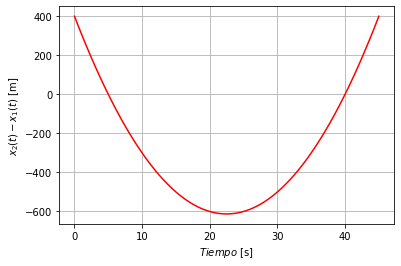

In [49]:
#Graficamos la solucion

t=np.linspace(0,45,100)
plt.plot(t,x_2(t)-x_1(t), color ='red')
plt.xlabel('$Tiempo$ [s]')
plt.ylabel('$x_2(t)-x_1(t)$ [m]')
plt.grid()

## **Solución Actividad 02**

In [52]:
from scipy.interpolate import interp1d

In [50]:
#Funcion tangente
x = np.linspace(-np.pi/4,np.pi/4,10)
y = np.tan(x)

In [53]:
w = interp1d(x,y, kind="quadratic")

x_1 = np.linspace(np.min(x),np.max(x))

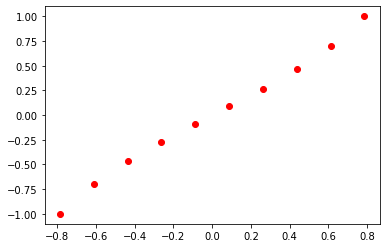

In [54]:
#Tangente sin interpolar
plt.plot(x,y,"ro")

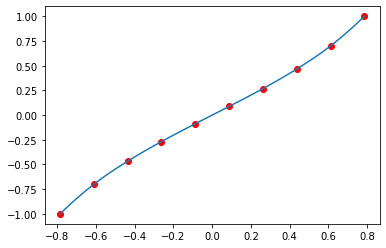

In [55]:
#Tangente interpolada
plt.plot(x,y,'ro')
plt.plot(x_1,w(x_1))

In [71]:
#Interpolación_vectorizada

x = np.array([1,2,3,4,5])
y = np.array([1,2,3,7,8])

f = interpolate.interp1d(x,y)

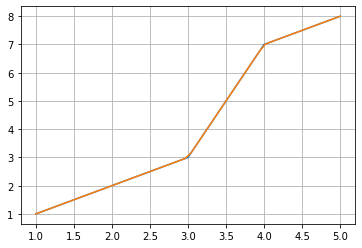

In [73]:
plt.plot(x,y)
x1 = np.linspace(np.min(x),np.max(x))
plt.plot(x1,f(x1))
plt.grid()

# **Solución Actividad 03**

In [58]:
x1_ = np.array([1, 1.3, 1.6, 1.9, 2.2])
y1_ = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

from scipy.interpolate import lagrange

f_ = lagrange(x1_, y1_)
print(f_)

          4           3         2
0.001825 x + 0.05529 x - 0.343 x + 0.07339 x + 0.9777


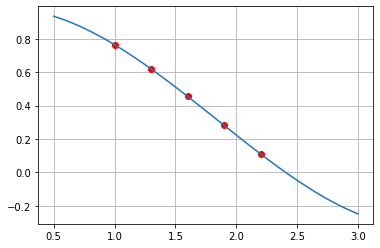

In [66]:
plt.figure()
plt.plot(x1_,y1_,"ro")
x = np.linspace(0.5,3)
plt.plot(x,f_(x))
plt.grid()

# **Solución Actividad 04**

In [10]:
from scipy.interpolate import lagrange

In [11]:
pixeles_x2 = [368,378,396,422,452,480,516,546,572,606,646,766]
pixeles_y2 = [224,180,144,106,84,62,54,50,46,52,68,248]

In [12]:
pixeles_x1 = [370, 378, 402, 430, 466, 536, 602, 664, 710, 744, 758, 764]
pixeles_y1 = [226, 176, 130, 98, 64, 46, 48, 76, 114, 168, 200, 246]


planetario1 = lagrange(pixeles_x1, pixeles_y1)

planetario1

poly1d([ 1.88802633e-22, -1.12214177e-18,  3.00355805e-15, -4.77700758e-12,
        5.01364873e-09, -3.64403180e-06,  1.87043667e-03, -6.77514060e-01,
        1.69571227e+02, -2.78987002e+04,  2.71179664e+06, -1.17763309e+08])

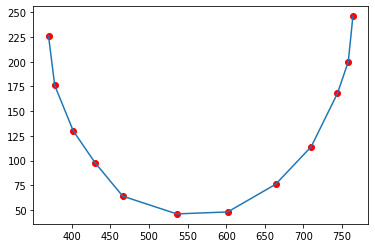

In [13]:
plt.figure()
plt.plot(pixeles_x1,pixeles_y1,"ro")
np.linspace(1,20)
plt.plot(pixeles_x1,planetario1(pixeles_x1))


In [14]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

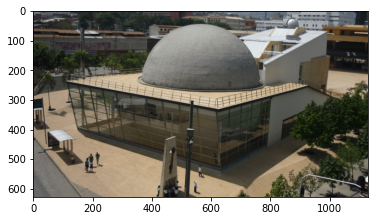

In [15]:
url = "https://www.turismodeestrellas.com/media/files/1973_planetario-medellin.jpg"
response = requests.get(url)
image = Image.open(BytesIO(response.content))
p = np.array(image)
plt.imshow(p)


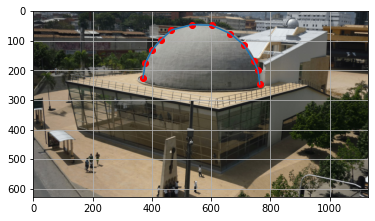

In [17]:
plt.figure()
plt.plot(pixeles_x1,pixeles_y1,"ro")
np.linspace(1,16)
plt.plot(pixeles_x1, planetario1(pixeles_x1))
plt.grid()
plt.imshow(p)

In [18]:
#otra manera

In [19]:
from scipy import interpolate

In [20]:
P = interpolate.lagrange(pixeles_x1,pixeles_y1)
x = np.linspace(np.min(pixeles_x1), np.max(pixeles_x1),100)

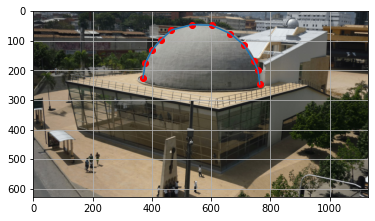

In [21]:
plt.figure()
plt.plot(pixeles_x1,pixeles_y1,"ro")
np.linspace(1,16)
plt.plot(pixeles_x1, planetario1(pixeles_x1))
plt.grid()
plt.imshow(p)

In [22]:
from scipy.interpolate import CubicSpline

In [23]:
x = CubicSpline(pixeles_x1,pixeles_y1)

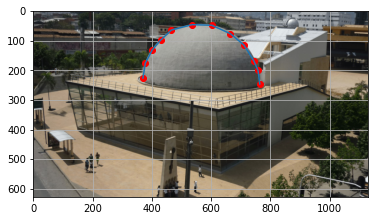

In [24]:
plt.figure()
plt.plot(pixeles_x1,pixeles_y1,"ro")
np.linspace(1,16)
plt.plot(pixeles_x1, x(pixeles_x1))
plt.grid()
plt.imshow(p)